In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import sys, csv
import seaborn as sns
import os
import math
import re
import glob
from collections import Counter
from itertools import repeat
from scipy import interpolate
from decimal import Decimal

input_data = glob.glob("*.xlsx")

dict = {}
for i in range(len(input_data)):
    dict[i+1] = pd.read_excel(input_data[i])    
    
additional_list = ["POS1", "POS2"]
pos = [3, 11]

#generate column numbers
col_num = []
for i in range(1, 13):
    col_num.append("_C"+str(i))
col_num = col_num * 2

ID_list = [] 
ID_index = []
sub_data = {}
for key, data in dict.items():
    #get list of id
    ID = data["ID"].dropna().tolist()
    ID = ID[len(ID) - ID[::-1].index("IgG") : ID.index("IgA")]
    acc = 0  #insert pos 1 & 2 to list
    for i in range(len(additional_list)):
        ID.insert(pos[i] + acc, additional_list[i])
        acc += 1

    ID = ["F" + str(key) + "_" + i for i in ID]     #Make Id unique
    ID = [i + j for i, j in zip(ID, col_num)] 
    ID_list.append(ID)  

    #get id index
    index = data.columns.get_loc("ID")
    data = data.iloc[:, index+1 : index+14].dropna()
    data.reset_index(drop=True, inplace=True)
    data.rename(columns={data.columns[0]: "Concentration"}, inplace = True) 
    sub_data[key] = data



4

In [26]:
IgG_cutoff = 0.2
IgA_cutoff = 0.15
IgM_cutoff = 0.3
#convert column values to numeric 
graph_table_sig.iloc[:, 2:] = graph_table_sig.iloc[:, 2:].astype(float)

IgG_group_sig = graph_table_sig[(graph_table_sig["Antibody"] == "IgG")]
IgA_group_sig = graph_table_sig[(graph_table_sig["Antibody"] == "IgA")]
IgM_group_sig = graph_table_sig[(graph_table_sig["Antibody"] == "IgM")]

IgG_endpoint, IgA_endpoint, IgM_endpoint = [], [], []
for col in IgG_group_sig.columns[2:len(IgG_group_sig.columns)]:  
    x = list(IgG_group_sig["Log(DF)"])
    y = list(IgG_group_sig[col])
    print(col)
    if IgG_cutoff > max(y):
        IgG_endpoint.append(0)
    else:
        ac = interpolate.interp1d(y, x, fill_value='extrapolate')
        IgG_endpoint.append(ac(IgG_cutoff))    
    
IgG_act_val = IgG_endpoint[:]
for i in range(len(IgG_act_val)):
    IgG_act_val[i] = 1 / (10**IgG_act_val[i])   #math.pow(10, IgG_act_val[i])

for col in IgA_group_sig.columns[2:len(IgA_group_sig.columns)]:  
    x = list(IgA_group_sig["Log(DF)"])
    y = list(IgA_group_sig[col])
    
    if IgA_cutoff > max(y):
        IgA_endpoint.append(0)
    else:
        ac = interpolate.interp1d(y, x, fill_value='extrapolate')
        IgA_endpoint.append(ac(IgA_cutoff))    

IgA_act_val = IgA_endpoint[:]
for i in range(len(IgA_act_val)):
    IgA_act_val[i] = 1 / (10**IgA_act_val[i])

for col in IgM_group_sig.columns[2:len(IgM_group_sig.columns)]:  
    x = list(IgM_group_sig["Log(DF)"])
    y = list(IgM_group_sig[col])
    
    if IgM_cutoff > max(y):
        IgM_endpoint.append(0)
    else:
        ac = interpolate.interp1d(y, x, fill_value='extrapolate')
        IgM_endpoint.append(ac(IgM_cutoff)) 

IgM_act_val = IgM_endpoint[:]
for i in range(len(IgM_act_val)):
    IgM_act_val[i] = 1 / math.pow(10, IgM_act_val[i])

IgG_endpoint = pd.DataFrame({"IgG Log Endpoint": IgG_endpoint})
IgG_act_val = pd.DataFrame({"IgG Endpoint": IgG_act_val})
IgA_endpoint = pd.DataFrame({"IgA Log Endpoint": IgA_endpoint})
IgA_act_val = pd.DataFrame({"IgA Endpoint": IgA_act_val})
IgM_endpoint = pd.DataFrame({"IgM Log Endpoint": IgM_endpoint})
IgM_act_val = pd.DataFrame({"IgM Endpoint": IgM_act_val})
result_data = pd.concat([result_data, IgG_endpoint, IgG_act_val, IgA_endpoint, IgA_act_val, IgM_endpoint, IgM_act_val], axis=1)

result_data


Neg1_F1
Neg2_F1
Neg3_F1
POS1_F1
127_P_20109_04_18_20_02_38_F1
127_P_20108_04_17_20_17_29_F1
110_P_20110_04_19_20_01_22_F1
110_P_20109_04_18_20_02_38_F1
110_P_20108_04_19_20_03_01_F1
127_S_20110>04_19_20_03_01_F1
055_S_20110_04_19_20_03_01_F1
055_S_20109_04_18_20_03_01_F1
POS2_F1
055_S_20108_04_17_20_01_43_F1
030_P_20108_04_17_20_04_43_F1
030_P_20107_04_16_20_03_39_F1
030_P_20106_04_15_20_02_47_F1
011_P_20108_04_17_20_04_04_F1
011_P_20106_04_15_20_06_24_F1
010_S_20108_04_15_20_5_23_F1
010_S_20106_04_15_20_03_37_F1
009_S_20107_04_16_20_03_18_F1
009_S_201_6_04_15_20_04_18_F1
199_S_20100_04_09_20_12_22_F1
Neg1_F2
Neg2_F2
Neg3_F2
POS1_F2
198_S_20098_04_07_20_08_03_F2
195_S_20098_04_07_20_06_22_F2
194_S_20099_04_08_20_04_58_F2
194_S_20098_04_07_20_04_38_F2
190_S_20098_04_07_20_02_38_F2
186_S_20099_04_08_20_03_01_F2
186_S_20098_04_07_20_03_51_F2
187_S_20099_04_08_20_04_28_F2
POS2_F2
187_S_20098_04_07_20_04_47_F2
185_S_20099_04_08_20_04_36_F2
185_S_20098_04_07_20_03_01_F2
181_S_20099_04_08_20_

174_P_20106_HEP_04_15_20_01_14_F32
174_P_20108_HEP_04_17_20_00_58_F32
174_S_20108_04_17_20_13_33_F32
181_S_20106_04_15_20_04_07_F32
181_S_20107_04_16_20_03_58_F32
181_S_20108_04_17_20_03_30_F32
185_S_20106_04_15_20_05_01_F32
185_S_20107_04_16_20_05_30_F32
POS2_F32
185_S_20108_04_17_20_08_19_F32
186_S_20106_04_15_20_05_22_F32
186_P_20107_HEP_04_16_20_10_37_F32
186_P_20108_HEP_04_17_20_05_00_F32
187_S_20106_04_15_20_04_04_F32
187_S_20107_04_16_20_04_23_F32
187_S_20108_04_17_20_01_13_F32
190_S_20106_04_15_20_04_59_F32
194_S_20106_04_15_20_05_48_F32
194_S_20107_04_16_20_05_06_F32
194_S_20108_04_17_20_02_57_F32
TMQ_TEC_00070355060_F33
CE_CLH_003153933_F33
LB_F33
POS1_F33
199_P_20106_HEP_04_15_20_16_47_F33
199_P_20107_HEP_04_16_20_01_22_F33
199_P_20108_HEP_04_17_20_08_08_F33
195_P_20106_HEP_04_15_20_07_39_F33
9_S_20110_04_19_20_5_45_F33
141_S_20111_04_20_20_5_00_F33
10_S_20110_04_19_20_4_55_F33
195_P_20107_HEP_04_16_20_06_13_F33
POS2_F33
199_P_20106_HEP_04_15_20_00_36_F33
10_S_200109_04_18_2

,File,Column,Sample ID,"(IgG, 0.02)","(IgG, 0.006666666666666667)","(IgG, 0.0022222222222222222)","(IgG, 0.0007407407407407407)","(IgG, 0.0002469135802469136)","(IgG, 8.23045267489712e-05)","(IgG, 2.7434842249657068e-05)",...,"(IgM, 0.0002469135802469136)","(IgM, 8.23045267489712e-05)","(IgM, 2.7434842249657068e-05)","(IgM, 0.0)",IgG Log Endpoint,IgG Endpoint,IgA Log Endpoint,IgA Endpoint,IgM Log Endpoint,IgM Endpoint
0,Exp#001 (1-19) 5-26-2020.xlsx,1,Neg1_F1,0.224,0.091,0.039,0.019,0.007,0,-0.001,...,0.003,0,-0.004,-0.004,-1.78506707285686,60.963104,-1.786096494328305,61.107778,-1.822927977375931,66.516284
1,Exp#001 (1-19) 5-26-2020.xlsx,2,Neg2_F1,0.212,0.094,0.038,0.014,0.005,0.002,0,...,0.005,0.003,0.004,0,-1.74749080990073,55.910170,-1.7548490702040873,56.865527,-1.810446933008837,64.631901
2,Exp#001 (1-19) 5-26-2020.xlsx,3,Neg3_F1,0.219,0.1,0.041,0.016,0.005,0.003,0,...,0.006,0.002,-0.001,-0.001,-1.775149028198822,59.586658,-1.736027965867643,54.453772,-1.807086150725696,64.133679
3,Exp#001 (1-19) 5-26-2020.xlsx,4,POS1_F1,2.219,2.117,1.639,1.006,0.444,0.177,0.062,...,0.068,0.022,0.023,0.001,-4.043475945130765,11052.892475,-2.9896441677443364,976.436865,-2.9750671906879296,944.206945
4,Exp#001 (1-19) 5-26-2020.xlsx,5,127_P_20109_04_18_20_02_38_F1,2.289,2.17,1.9,1.295,0.68,0.294,0.117,...,0.034,0.013,0.004,-0.003,-4.337962706994491,21775.227797,-3.0851090050144694,1216.491294,-2.6742619808953285,472.347891
5,Exp#001 (1-19) 5-26-2020.xlsx,6,127_P_20108_04_17_20_17_29_F1,2.382,2.234,1.93,1.419,0.718,0.308,0.13,...,0.042,0.013,0.014,0.002,-4.374065578550756,23662.769788,-3.159545273886006,1443.927121,-2.663418316015336,460.700110
6,Exp#001 (1-19) 5-26-2020.xlsx,7,110_P_20110_04_19_20_01_22_F1,2.057,1.831,1.313,0.647,0.278,0.107,0.044,...,0.3,0.11,0.045,-0.001,-3.825089279753462,6684.813260,-2.2857743061176725,193.096457,-3.6074550232146687,4050.000000
7,Exp#001 (1-19) 5-26-2020.xlsx,8,110_P_20109_04_18_20_02_38_F1,1.995,1.763,1.286,0.662,0.287,0.1,0.039,...,0.289,0.105,0.044,0.002,-3.8294312219345117,6751.981162,-2.3316742768990495,214.622019,-3.593643618472784,3923.228636
8,Exp#001 (1-19) 5-26-2020.xlsx,9,110_P_20108_04_19_20_03_01_F1,1.941,1.674,1.07,0.519,0.214,0.07,0.028,...,0.285,0.1,0.033,0,-3.653841811867969,4506.525282,-2.291897388842007,195.838191,-3.5909646572681364,3899.102546
9,Exp#001 (1-19) 5-26-2020.xlsx,10,127_S_20110>04_19_20_03_01_F1,2.316,2.195,1.848,1.255,0.651,0.253,0.098,...,0.034,0.01,0.003,0,-4.247720965032022,17689.720255,-3.0470268827503033,1114.363510,-2.612606449543883,409.832551


In [ ]:
IgG_act_val = IgG_endpoint[:]
for i in range(len(IgG_act_val)):
    IgG_act_val[i] = 1 / (10**IgG_act_val[i])   #math.pow(10, IgG_act_val[i])

for col in IgA_group_sig.columns[2:len(IgA_group_sig.columns)]:  
    x = list(IgA_group_sig["Log(DF)"])
    y = list(IgA_group_sig[col])
    
    if IgA_cutoff > max(y):
        ac = AxisCam(x, y)
        IgA_endpoint.append(ac.getX(IgA_cutoff))
    else:
        ac = interpolate.interp1d(y, x, fill_value='extrapolate')
        IgA_endpoint.append(ac(IgA_cutoff))    

IgA_act_val = IgA_endpoint[:]
for i in range(len(IgA_act_val)):
    IgA_act_val[i] = 1 / (10**IgA_act_val[i])

for col in IgM_group_sig.columns[2:len(IgM_group_sig.columns)]:  
    x = list(IgM_group_sig["Log(DF)"])
    y = list(IgM_group_sig[col])
    
    if IgM_cutoff > max(y):
        ac = AxisCam(x, y)
        IgM_endpoint.append(ac.getX(IgM_cutoff))
    else:
        ac = interpolate.interp1d(y, x, fill_value='extrapolate')
        IgM_endpoint.append(ac(IgM_cutoff)) 

IgM_act_val = IgM_endpoint[:]
for i in range(len(IgM_act_val)):
    IgM_act_val[i] = 1 / math.pow(10, IgM_act_val[i])

IgG_endpoint = pd.DataFrame({"IgG Log Endpoint": IgG_endpoint})
IgG_act_val = pd.DataFrame({"IgG Endpoint": IgG_act_val})
IgA_endpoint = pd.DataFrame({"IgA Log Endpoint": IgA_endpoint})
IgA_act_val = pd.DataFrame({"IgA Endpoint": IgA_act_val})
IgM_endpoint = pd.DataFrame({"IgM Log Endpoint": IgM_endpoint})
IgM_act_val = pd.DataFrame({"IgM Endpoint": IgM_act_val})
result_data = pd.concat([result_data, IgG_endpoint, IgG_act_val, IgA_endpoint, IgA_act_val, IgM_endpoint, IgM_act_val], axis=1)




In [26]:
import numpy as np
from scipy import interpolate

x = [-1.6989700043360187, -2.1760912590556813, -2.6532125137753435, -3.130333768495006, -3.6074550232146687, -4.084576277934331, -4.5616975326539935]

y = [2.764, 2.677, 2.602, 2.105, 1.435, 0.689, 0.348] #-0.01
y1 = [2.849, 2.810, 2.696, 2.207, 1.564, 0.823, 0.331]
y2 = [2.560, 2.543, 2.304, 1.844, 1.119, 0.549, 0.218]

test = [2.415, 2.353, 2.166, 1.764, 1.138, 0.567, 0.227]
#f = interpolate.interp1d(y, x, fill_value='extrapolate')
#f(IgG_cutoff)

#w = interpolate.interp1d(y1, x, fill_value='extrapolate')
#w(IgG_cutoff)

#t = interpolate.interp1d(y2, x, fill_value='extrapolate')
#t(IgG_cutoff)

q = interpolate.interp1d(test, x, fill_value='extrapolate')
q(IgG_cutoff)

u = 1
float(u)

1.0

[-5.41455076, 2.16820095, 2.89120087, -30.74652835]


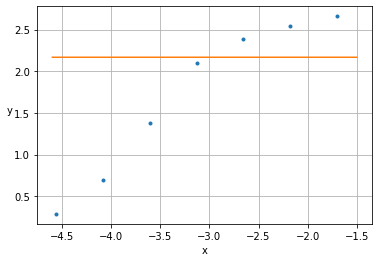

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
x = IgG_group["Log(DF)"]
y = IgG_group["003_S_20098_04_07_20_04_57_F3"]
#print(x)
#print(y)

p_guess=(np.median(x),np.median(y),1.0,1.0)
#p, cov, infodict, mesg, ier = scipy.optimize.leastsq(
#    residuals,p_guess,args=(x,y),full_output=1)  
#p = [-3.41455076, 0.01109241, 2.63022998, 2.22139116]
p = [-5.41455076, 2.16820095, 2.89120087, -30.74652835]
xp = np.linspace(-4.6, -1.5, 1500)   #np.linspace(-4.6, -1.5, 1500)
pxp=sigmoid(p,xp)
print(p)
# Plot the results
plt.plot(x, y, '.', xp, pxp, '-')
plt.xlabel('x')
plt.ylabel('y',rotation='horizontal') 
plt.grid(True)
plt.show()

In [3]:
# x0 = the minimum value that can be obtained (i.e. what happens at 0 dose)
# y0 = the maximum value that can be obtained (i.e. what happens at infinite dose)
# c = the point of inflection (i.e. the point on the S shaped curve halfway between x0 and y0)
# k = Hill’s slope of the curve (i.e. this is related to the steepness of the curve at point c).

#sigmoidal functions
def sigmoid(p, x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

#use resize if normalized is needed
def resize(arr,lower=0.0,upper=1.0):    #lower=0.0, upper=1.0
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr *= (upper-lower)/arr.max()
    arr += lower
    return arr

#calculate endpoint titer
class AxisCam:
    def __init__(self, x=None, y=None):
        self.x = x if x else []
        self.y = y if y else []

        if len(self.x):
            self.xMin = min(self.x)
            self.xMax = max(self.x)
        else:
            self.xMin = None
            self.xMax = None

        if len(self.y):
            self.yMin = min(self.y)
            self.yMax = max(self.y)
        else:
            self.yMin = None
            self.yMax = None

        self._interpolX, self._interpolY = self.setInterpolator()

    def setInterpolator(self, interpolator=interpolate.interp1d):
        """
        Define the interpolator to use to approximate the axis cam positions
        :param interpolator: interpolator function to use, default is scipy.interpolate.interp1d
        :return: a tuple with the interpolator functions for x and y values
        """
        if len(self.x) <= 0 or len(self.y) <= 0:
            return None, None
        with np.errstate(divide='ignore', invalid='ignore'):  # silent the warnings caused by the interpolator
            self._interpolX = interpolator(self.y, self.x)  # x = f(y)
            self._interpolY = interpolator(self.x, self.y)  # y = f(x)
        return self._interpolX, self._interpolY

    def getX(self, yValue):
        """
        Return x-value corresponding to a y-value using the interpolator
        :param yValue: y-value we want to know the corresponding x-value
        :return: x-value corresponding to the given y-value
        """
        if yValue < self.yMin:
            #raise ValueError("value should be greater than the minimum y-value")
            return 0
        elif yValue > self.yMax:
            #raise ValueError("value should be lesser than the maximum y-value")
            return 0
        return float(self._interpolX(yValue))

    def getY(self, value):
        """
        Return a y-value corresponding to a x-value using the interpolator
        :param value: x-value we want to know the corresponding y-value
        :return: the y-value corresponding to the given x-value
        """
        if value < self.xMin:
            raise ValueError("value should be greater than the minimum x-value")
        elif value > self.xMax:
            raise ValueError("value should be lesser than the maximum x-value")
        return float(self._interpolY(value))

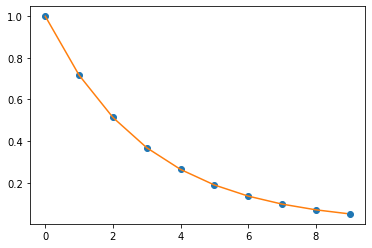

In [57]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

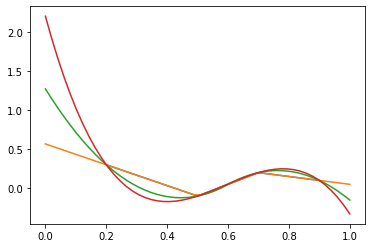

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

# given values
xi = np.array([0.2, 0.5, 0.7, 0.9])
yi = np.array([0.3, -0.1, 0.2, 0.1])
# positions to inter/extrapolate
x = np.linspace(0, 1, 50)
# spline order: 1 linear, 2 quadratic, 3 cubic ... 
order = 1
# do inter/extrapolation
s = InterpolatedUnivariateSpline(xi, yi, k=order)
y = s(x)

# example showing the interpolation for linear, quadratic and cubic interpolation
plt.figure()
plt.plot(xi, yi)
for order in range(1, 4):
    s = InterpolatedUnivariateSpline(xi, yi, k=order)
    y = s(x)
    plt.plot(x, y)
plt.show()